In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
import seaborn as sns

In [2]:
df = pd.read_csv('HR_comma_sep.csv')
print(df.shape)
df.head()

(14999, 10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
plt.style.use('default')

In [4]:
x = df.drop('left', axis='columns')
x.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low


In [5]:
y = df.left
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

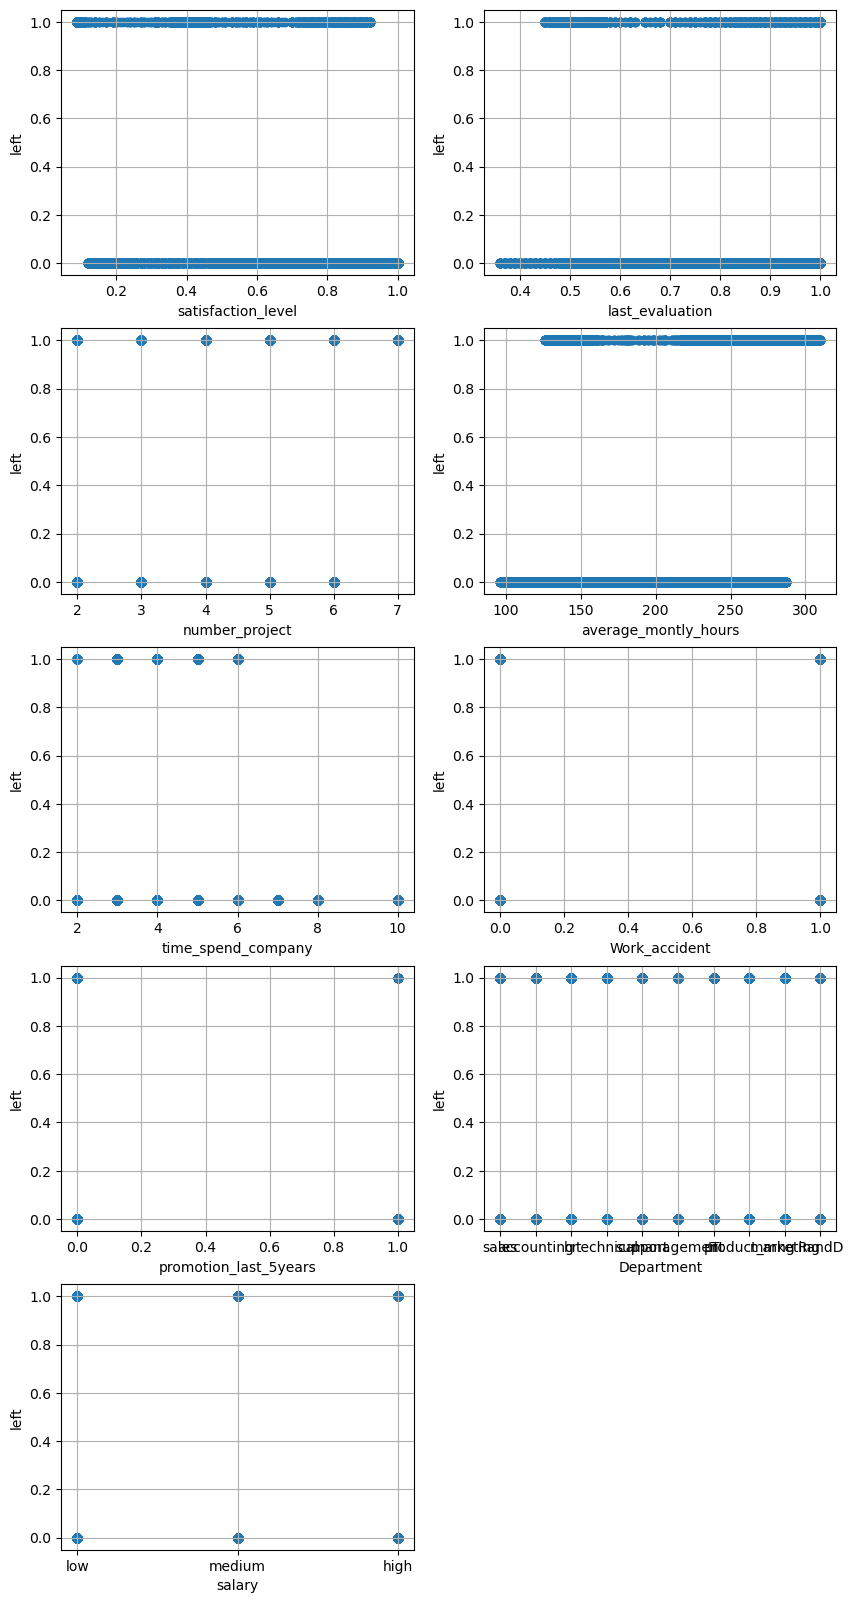

In [6]:
plt.figure(figsize=(10,20))
for i in range(len(x.columns)):
    plt.subplot(5, 2, 1+i)
    plt.scatter(x[x.columns[i]], y)
    plt.xlabel(x.columns[i])
    plt.ylabel('left')
    plt.grid(True)

In [7]:
xx = x.drop(['satisfaction_level', 'last_evaluation', 'average_montly_hours']
           , axis='columns')
xx

,number_project,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,2,3,0,0,sales,low
1,5,6,0,0,sales,medium
2,7,4,0,0,sales,medium
3,5,5,0,0,sales,low
4,2,3,0,0,sales,low
...,...,...,...,...,...,...
14994,2,3,0,0,support,low
14995,2,3,0,0,support,low
14996,2,3,0,0,support,low
14997,6,4,0,0,support,low


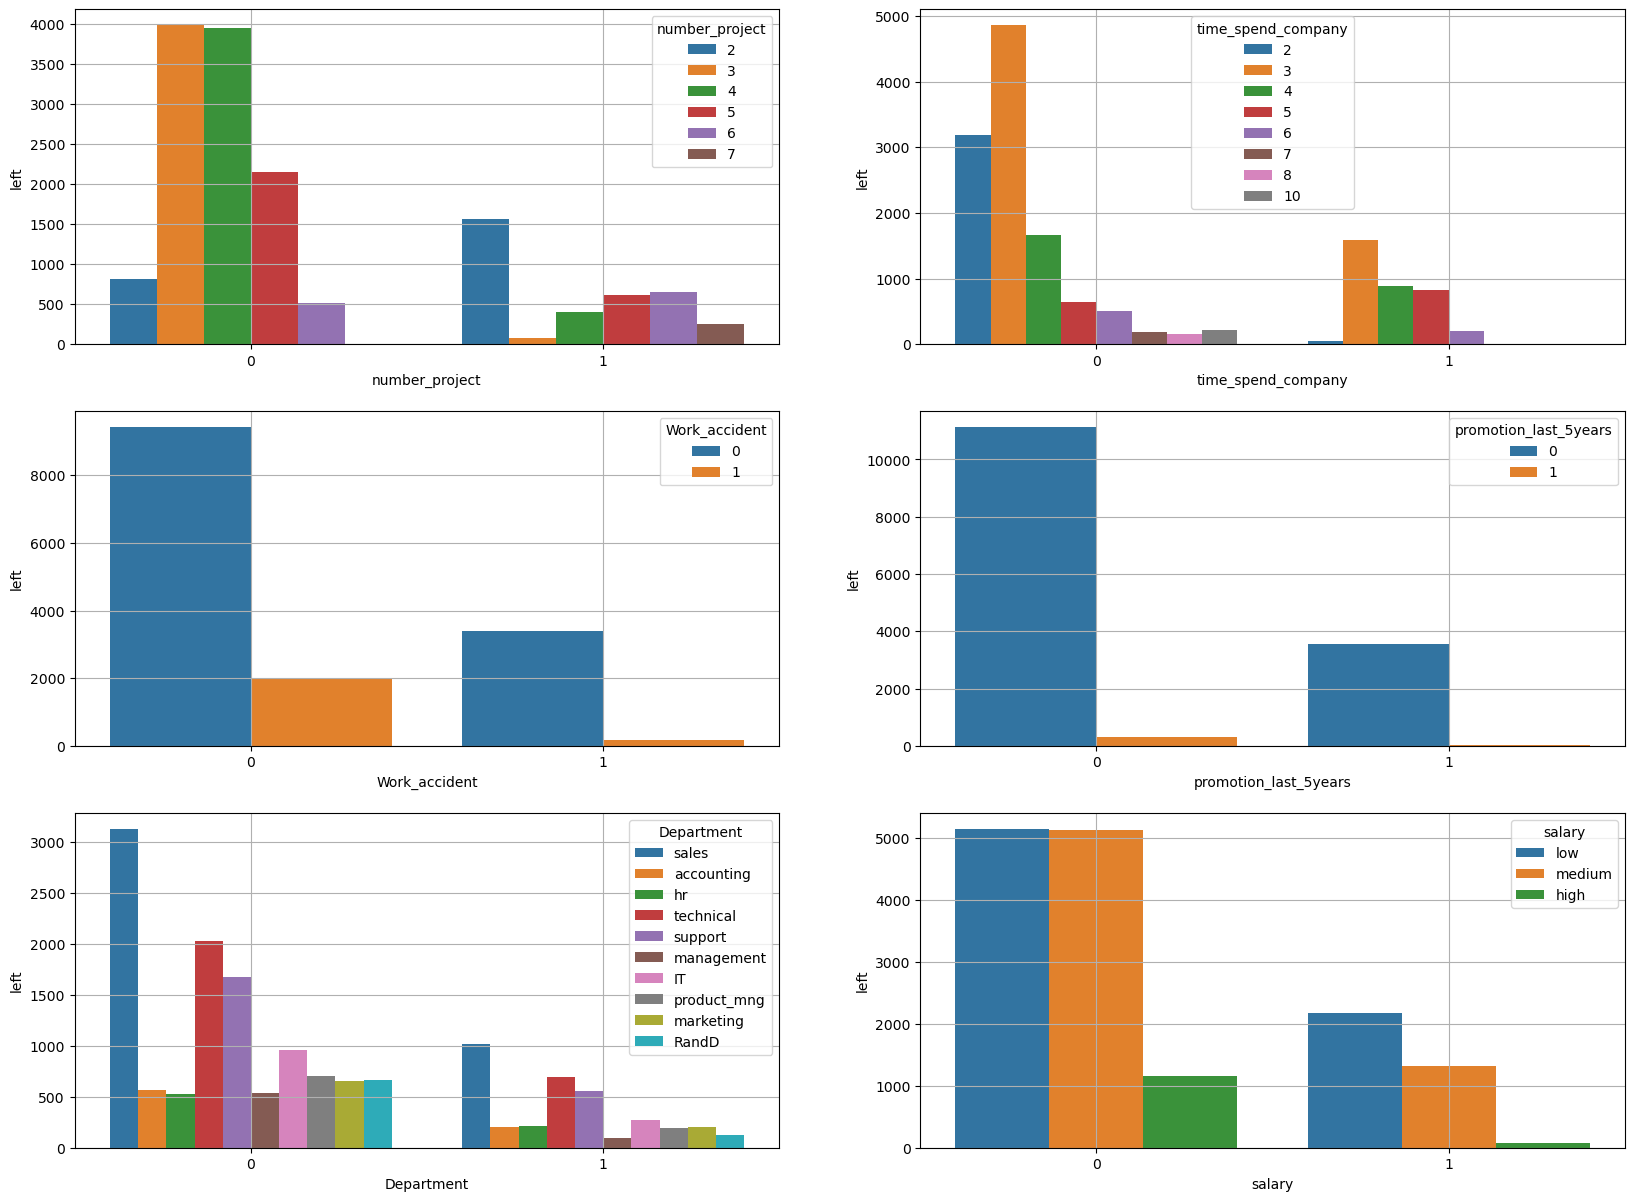

In [8]:
plt.figure(figsize=(20,20))
for i in range(len(xx.columns)):
    plt.subplot(4, 2, 1+i)
#     plt.scatter(xx[xx.columns[i]], y)
    sns.countplot(df.left, hue=xx[xx.columns[i]])
    plt.xlabel(xx.columns[i])
    plt.ylabel('left')
    plt.grid(True)

In [10]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


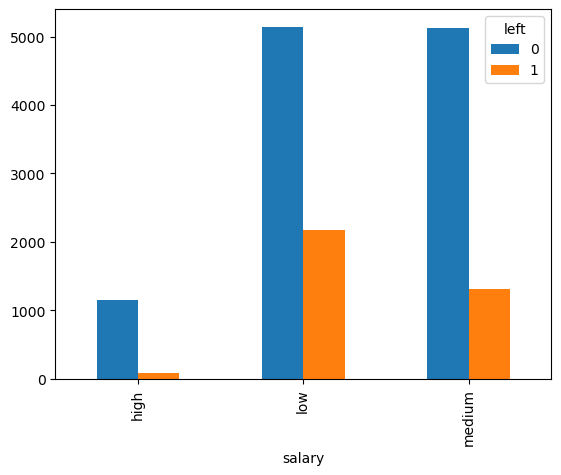

In [13]:
pd.crosstab(df.salary, y).plot(kind='bar')

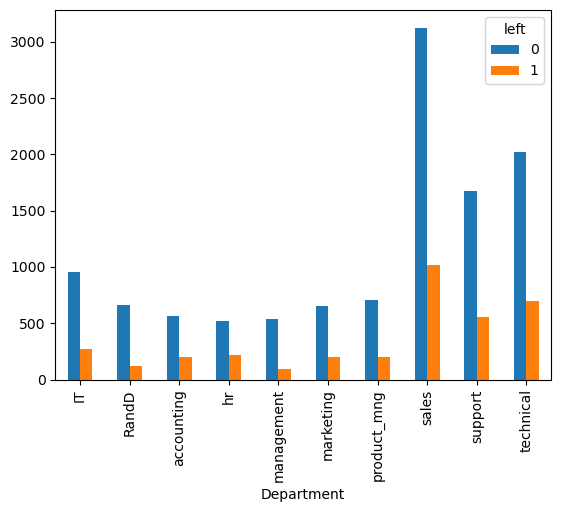

In [14]:
pd.crosstab(df.Department, y).plot(kind='bar')

In [30]:
x = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
x

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low
...,...,...,...,...
14994,0.40,151,0,low
14995,0.37,160,0,low
14996,0.37,143,0,low
14997,0.11,280,0,low


In [31]:
dummies = pd.get_dummies(x.salary)
dummies

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [32]:
x = pd.concat([x, dummies], axis='columns')
x

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,high,low,medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0
...,...,...,...,...,...,...,...
14994,0.40,151,0,low,0,1,0
14995,0.37,160,0,low,0,1,0
14996,0.37,143,0,low,0,1,0
14997,0.11,280,0,low,0,1,0


In [33]:
x = x.drop('salary', axis='columns')
x

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0
...,...,...,...,...,...,...
14994,0.40,151,0,0,1,0
14995,0.37,160,0,0,1,0
14996,0.37,143,0,0,1,0
14997,0.11,280,0,0,1,0


In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [35]:
model = LogisticRegression()

In [36]:
model.fit(x_train, y_train)

c:\users\yash meshram\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
model.score(x_test, y_test)

0.775

In [38]:
x

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0
...,...,...,...,...,...,...
14994,0.40,151,0,0,1,0
14995,0.37,160,0,0,1,0
14996,0.37,143,0,0,1,0
14997,0.11,280,0,0,1,0
